In [1]:
# Packages & Settings


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import statsmodels.api as sm

In [2]:
# importing Billboard CSV
billboard_df = pd.read_csv('data/Hot_Stuff.csv')

In [3]:
# converting WeekID to datetime
billboard_df['WeekID'] = pd.to_datetime(billboard_df['WeekID'])

In [4]:
# renaming columns to python standards

billboard_df = billboard_df.rename(columns={"url": "url", "WeekID": "week_id", "Week Position": 'week_position', "Song": 'song', "Performer": "performer", "SongID": "song_id", "Instance": "instance", "Previous Week Position": "prev_week_position", "Peak Position": "peak_position", "Weeks on Chart": "weeks_on_chart"})

In [5]:
#creating date/month/day/year columns


billboard_df['date']= billboard_df['week_id'].dt.date
billboard_df['month'] = billboard_df['week_id'].dt.month
billboard_df['day']= billboard_df['week_id'].dt.day
billboard_df['year'] = billboard_df['week_id'].dt.year

In [6]:
# replacing artist names: pre string-split

billboard_df["performer"]= billboard_df["performer"].replace("Elvis Presley With The Jordanaires", "Elvis Presley") 
billboard_df["performer"]= billboard_df["performer"].replace("James Brown And The Famous Flames", "James Brown") 
billboard_df["performer"]= billboard_df["performer"].replace("Prince and the Revolution", "Prince") 


In [7]:
# String Split
new = billboard_df["performer"].str.split(" Featuring ", n = 1, expand = True) 
billboard_df["main_performer"]= new[0] 
billboard_df["featured_performer"]= new[1] 

In [8]:
# Post-String Split replacements of artist names
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Janet Jackson", "Janet")
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Jay Z", "Jay-Z")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Janet Jackson", "Janet")
billboard_df["featured_performer"]= billboard_df["featured_performer"].replace("Jay Z", "Jay-Z")
# Frankie Valli and the 4 Seasons
billboard_df["main_performer"]= billboard_df["main_performer"].replace("Frankie Valli", "The 4 Seasons")

In [9]:
# dropping 'URL' column- I don't think I'll reference it for now
# Note: I might be using the URL column if I end up doing some webscraping
billboard_df = billboard_df.drop(columns=['url'])

# Note: This is the end of cleaning billboard_df

In [10]:
weekly_array_groupby = billboard_df.groupby('week_id').song_id.unique().reset_index()

In [11]:
weekly_array_groupby = weekly_array_groupby.rename(columns={"song_id": "week_song_array"})

In [12]:
weekly_array_groupby.head(200)

,week_id,week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P..."
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...
5,1958-09-06,"[La PalomaBilly Vaughn And His Orchestra, No O..."
6,1958-09-13,[Ten Commandments Of LoveHarvey & The Moonglow...
7,1958-09-20,"[Born Too LatePoni-Tails, Summertime BluesEddi..."
8,1958-09-27,"[Devoted To YouThe Everly Brothers, No One But..."
9,1958-10-04,[Leave Me Alone (Let Me Cry)Dicky Doo And The ...


In [13]:
weekly_array_groupby.dtypes

week_id            datetime64[ns]
week_song_array            object
dtype: object

In [14]:
weekly_array_groupby['prev_week_song_array'] = weekly_array_groupby['week_song_array'].shift(periods=1)

In [15]:
weekly_array_groupby.head(200)

,week_id,week_song_array,prev_week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P...",NaN
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev...","[Poor Little FoolRicky Nelson, PatriciaPerez P..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg...","[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo...","[How The Time FliesJerry Wallace, Down In Virg..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."
5,1958-09-06,"[La PalomaBilly Vaughn And His Orchestra, No O...",[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...
6,1958-09-13,[Ten Commandments Of LoveHarvey & The Moonglow...,"[La PalomaBilly Vaughn And His Orchestra, No O..."
7,1958-09-20,"[Born Too LatePoni-Tails, Summertime BluesEddi...",[Ten Commandments Of LoveHarvey & The Moonglow...
8,1958-09-27,"[Devoted To YouThe Everly Brothers, No One But...","[Born Too LatePoni-Tails, Summertime BluesEddi..."
9,1958-10-04,[Leave Me Alone (Let Me Cry)Dicky Doo And The ...,"[Devoted To YouThe Everly Brothers, No One But..."


In [16]:
set(weekly_array_groupby.loc[0,"week_song_array"])

{"(It's Been A Long Time) Pretty BabyGino & Gina",
 'A Certain SmileJohnny Mathis',
 'All I Have To Do Is DreamThe Everly Brothers',
 'Angel BabyDean Martin',
 'Are You Really MineJimmie Rodgers',
 'Baubles, Bangles And BeadsThe Kirby Stone Four',
 'Beautiful DelilahChuck Berry',
 'Betty Lou Got A New Pair Of ShoesBobby Freeman',
 'Big ManThe Four Preps',
 'Bird DogThe Everly Brothers',
 'Blip BlopBill Doggett',
 'Blue Blue DayDon Gibson',
 'Blue BoyJim Reeves',
 'Born Too LatePoni-Tails',
 'By The Light Of The Silvery MoonJimmy Bowen with the Rhythm Orchids',
 'Chantilly LaceBig Bopper',
 'Come Closer To Me (Acercate Mas)Nat King Cole',
 'Come What MayClyde McPhatter',
 'Crazy Eyes For YouBobby Hamilton',
 'Delicious!Jim Backus & Friend',
 'Do You Want To DanceBobby Freeman',
 "Don't Ask Me WhyElvis Presley With The Jordanaires",
 "Don't Go HomeThe Playmates",
 'Early In The MorningBuddy Holly',
 'Early In The MorningThe Rinky-Dinks',
 'Enchanted IslandThe Four Lads',
 'Endless SleepJ

In [17]:
# trying modified function

def similarity_func_two(df):
    try:
        left = set(df.week_song_array)
        right= set(df.prev_week_song_array)
    
        return len(left & right)/len(left | right)
                
    except:
        return 1

In [18]:
new_df = weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()

In [19]:
new_df.head()

,0
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


In [20]:
new_df.describe()

,0
count,3178.000000
mean,0.827942
std,0.062565
min,0.242236
25%,0.785714
50%,0.834862
75%,0.869159
max,1.000000


([], <a list of 0 Text yticklabel objects>)

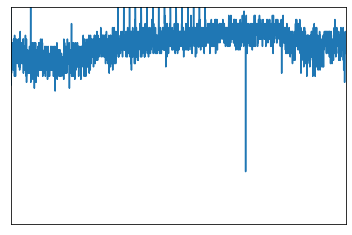

In [36]:
weekly_array_groupby.apply(similarity_func_two, axis=1).plot()

plt.xlim(0,3000)
plt.ylim(0,1)
plt.xticks(range(0), ''.split())
plt.yticks(range(0), ''.split())

In [37]:
new_df = new_df.rename(columns={"0": "similarity_score"})

In [38]:
new_df.columns = ["sim_score"]

In [39]:
new_df.head()

,sim_score
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


In [40]:
new_df.loc[new_df['sim_score'].idxmin()]

sim_score    0.242236
Name: 2105, dtype: float64

In [41]:
new_df.loc[new_df['sim_score'].idxmax()]

sim_score    1.0
Name: 0, dtype: float64

In [42]:
type(new_df)

pandas.core.frame.DataFrame

In [43]:
new_df.dtypes

sim_score    float64
dtype: object

In [44]:
new_df.columns

Index(['sim_score'], dtype='object')

In [45]:
set(weekly_array_groupby.loc[2105,"week_song_array"])

{"(God Must Have Spent) A Little More Time On You'N Sync",
 '...Baby One More TimeBritney Spears',
 'A Little Past Little RockLee Ann Womack',
 'Absence Of The HeartDeana Carter',
 'All The Places (I Will Kiss You)Aaron Hall',
 'Angel In DisguiseBrandy',
 'Angel Of MineMonica',
 'AngelSarah McLachlan',
 'Are You That Somebody?Aaliyah',
 'Because Of You98 Degrees',
 'Can I Get A...Jay-Z Featuring Amil (Of Major Coinz) & Ja',
 "Can't Get EnoughWillie Max Featuring Raphael Saadiq",
 'Celebrity SkinHole',
 'Changes2Pac',
 'Come And Get With MeKeith Sweat Featuring Snoop Dogg',
 'CrushJennifer Paige',
 "Don't Laugh At MeMark Wills",
 'Doo Wop (That Thing)Lauryn Hill',
 "Everything's ChangedLonestar",
 'Father Of MineEverclear',
 'Fire EscapeFastball',
 'Fly AwayLenny Kravitz',
 'For A Little WhileTim McGraw',
 'For You I WillAaron Tippin',
 'From This Moment OnShania Twain',
 'Ghetto CowboyMo Thugs Family Featuring Bone Thugs-N-Harmony',
 'HandsJewel',
 'Hard Knock Life (Ghetto Anthem)JAY-Z

In [46]:
billboard_df.head()

,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer,featured_performer
0,1990-02-10,75,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,NaN,75,1,1990-02-10,2,10,1990,Jane Child,None
1,1990-02-17,53,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,75.0,53,2,1990-02-17,2,17,1990,Jane Child,None
2,1990-02-24,43,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,53.0,43,3,1990-02-24,2,24,1990,Jane Child,None
3,1990-03-03,37,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,43.0,37,4,1990-03-03,3,3,1990,Jane Child,None
4,1990-03-10,27,Don't Wanna Fall In Love,Jane Child,Don't Wanna Fall In LoveJane Child,1,37.0,27,5,1990-03-10,3,10,1990,Jane Child,None


In [47]:
weekly_array_groupby.iloc[2105]

week_id                                               1998-12-05 00:00:00
week_song_array         [Save TonightEagle-Eye Cherry, Thank UAlanis M...
prev_week_song_array    [Doo Wop (That Thing)Lauryn Hill, I Had No Rig...
Name: 2105, dtype: object

In [48]:
weekly_array_groupby.iloc[2104]

week_id                                               1998-11-28 00:00:00
week_song_array         [Doo Wop (That Thing)Lauryn Hill, I Had No Rig...
prev_week_song_array    [...Baby One More TimeBritney Spears, Let Me R...
Name: 2104, dtype: object

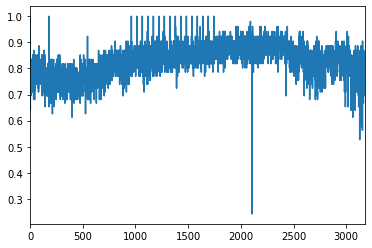

In [49]:
new_df.sim_score.plot()

In [50]:
new_df.head()

,sim_score
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


NameError: name 'also_a_new_groupby' is not defined

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'Similarity Score')

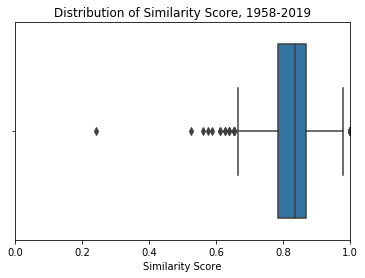

In [54]:
ax = sns.boxplot(x=new_df["sim_score"])
plt.title('Distribution of Similarity Score, 1958-2019')
plt.xlim(0,1)
plt.xlabel('Similarity Score')

In [55]:
new_df.sim_score.describe()

count    3178.000000
mean        0.827942
std         0.062565
min         0.242236
25%         0.785714
50%         0.834862
75%         0.869159
max         1.000000
Name: sim_score, dtype: float64

In [ ]:
new_df.head()

In [56]:
new_df.head()

,sim_score
0,1.000000
1,0.666667
2,0.639344
3,0.724138
4,0.769912


In [57]:
new_df = new_df.sort_values(by=['sim_score'], ascending=True)

In [58]:
new_df.head(3599)

,sim_score
2105,0.242236
3128,0.526718
3154,0.562500
3150,0.574803
3141,0.587302
398,0.612903
3062,0.612903
526,0.626016
212,0.626016
3046,0.639344


In [59]:
lower_bound = 0.785714 - (1.5 * (0.869159-0.785714))

In [60]:
print(lower_bound)

0.6605465


In [61]:
lower_bound_df = new_df.sort_values(by=['sim_score'], ascending=True)

In [62]:
lowest_df = lower_bound_df.head(20)

In [63]:
lowest_df.head(30)

,sim_score
2105,0.242236
3128,0.526718
3154,0.562500
3150,0.574803
3141,0.587302
398,0.612903
3062,0.612903
526,0.626016
212,0.626016
3046,0.639344


In [64]:
weekly_array_groupby.iloc[3128]

week_id                                               2018-07-14 00:00:00
week_song_array         [Don't Matter To MeDrake Featuring Michael Jac...
prev_week_song_array    [Done For MeCharlie Puth Featuring Kehlani, So...
Name: 3128, dtype: object

In [65]:
weekly_array_groupby.iloc[3154]

week_id                                               2019-01-12 00:00:00
week_song_array         [Baby SharkPinkfong, Burning ManDierks Bentley...
prev_week_song_array    [A Lot21 Savage, Blue ChristmasElvis Presley, ...
Name: 3154, dtype: object

In [66]:
weekly_array_groupby.iloc[3150]


week_id                                               2018-12-15 00:00:00
week_song_array         [Rudolph The Red-Nosed ReindeerGene Autry, Goi...
prev_week_song_array    [Best ShotJimmie Allen, MAMA6ix9ine Featuring ...
Name: 3150, dtype: object

In [67]:
weekly_array_groupby.iloc[3141]

week_id                                               2018-10-13 00:00:00
week_song_array         [Don't CryLil Wayne Featuring XXXTENTACION, De...
prev_week_song_array    [Hangin' OnChris Young, Brokenlovelytheband, N...
Name: 3141, dtype: object

In [68]:
weekly_array_groupby.iloc[398]

week_id                                               1966-03-19 00:00:00
week_song_array         [I Can't Grow Peaches On A Cherry TreeJust Us,...
prev_week_song_array    [I Want SomeoneThe Mad Lads, Barbara AnnThe Be...
Name: 398, dtype: object

In [69]:
weekly_array_groupby.head()

,week_id,week_song_array,prev_week_song_array
0,1958-08-02,"[Poor Little FoolRicky Nelson, PatriciaPerez P...",NaN
1,1958-08-09,"[Susie Darlin'Robin Luke, Devoted To YouThe Ev...","[Poor Little FoolRicky Nelson, PatriciaPerez P..."
2,1958-08-16,"[How The Time FliesJerry Wallace, Down In Virg...","[Susie Darlin'Robin Luke, Devoted To YouThe Ev..."
3,1958-08-23,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo...","[How The Time FliesJerry Wallace, Down In Virg..."
4,1958-08-30,[Nel Blu Dipinto Di Blu (Volaré)Domenico Modug...,"[Down The Aisle Of LoveThe Quin-Tones, Near Yo..."


In [70]:
new_df.head(200)

,sim_score
2105,0.242236
3128,0.526718
3154,0.562500
3150,0.574803
3141,0.587302
398,0.612903
3062,0.612903
526,0.626016
212,0.626016
3046,0.639344


In [71]:
new_df = new_df.reset_index()

In [72]:
new_df.head()

,index,sim_score
0,2105,0.242236
1,3128,0.526718
2,3154,0.562500
3,3150,0.574803
4,3141,0.587302


In [73]:
new_df = new_df.sort_values(by=['sim_score'], ascending=False)

In [74]:
new_df.sim_score.describe()

count    3178.000000
mean        0.827942
std         0.062565
min         0.242236
25%         0.785714
50%         0.834862
75%         0.869159
max         1.000000
Name: sim_score, dtype: float64

In [75]:
upper_bound = 0.869159 + (1.5 * (0.869159-0.785714))

In [76]:
print(upper_bound)

0.9943265


In [77]:
weekly_array_groupby.iloc[961]

week_id                                               1977-01-01 00:00:00
week_song_array         [Heart On My SleeveBryan Ferry, Ha Cha Cha (fu...
prev_week_song_array    [Keep Me Cryin'Al Green, MademoiselleStyx, Los...
Name: 961, dtype: object

In [78]:
new_df.head(20)

,index,sim_score
3177,0,1.000000
3168,1326,1.000000
3160,961,1.000000
3161,179,1.000000
3162,1639,1.000000
3163,1065,1.000000
3165,1170,1.000000
3166,1222,1.000000
3167,1274,1.000000
3164,1117,1.000000


In [79]:
weekly_groupby = billboard_df.groupby('week_id').min().reset_index().reset_index()

In [80]:
weekly_groupby.shape

(3178, 15)

In [81]:
weekly_groupby.head()

,index,week_id,week_position,song,performer,song_id,instance,prev_week_position,peak_position,weeks_on_chart,date,month,day,year,main_performer
0,0,1958-08-02,1,(It's Been A Long Time) Pretty Baby,Big Bopper,(It's Been A Long Time) Pretty BabyGino & Gina,1,NaN,1,1,1958-08-02,8,2,1958,Big Bopper
1,1,1958-08-09,1,A Certain Smile,Big Bopper,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-09,8,9,1958,Big Bopper
2,2,1958-08-16,1,A Certain Smile,Betty Madigan,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-16,8,16,1958,Betty Madigan
3,3,1958-08-23,1,A Certain Smile,Betty Madigan,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-23,8,23,1958,Betty Madigan
4,4,1958-08-30,1,A Certain Smile,Andy Williams,A Certain SmileJohnny Mathis,1,1.0,1,1,1958-08-30,8,30,1958,Andy Williams


In [82]:
weekly_groupby.iloc[2105]

index                                                              2105
week_id                                             1998-12-05 00:00:00
week_position                                                         1
song                    (God Must Have Spent) A Little More Time On You
performer                                                       'N Sync
song_id               (God Must Have Spent) A Little More Time On Yo...
instance                                                              1
prev_week_position                                                    1
peak_position                                                         1
weeks_on_chart                                                        1
date                                                         1998-12-05
month                                                                12
day                                                                   5
year                                                            

In [83]:
weekly_groupby = weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])

In [84]:
weekly_groupby.head()

,index,week_id,year,main_performer
0,0,1958-08-02,1958,Big Bopper
1,1,1958-08-09,1958,Big Bopper
2,2,1958-08-16,1958,Betty Madigan
3,3,1958-08-23,1958,Betty Madigan
4,4,1958-08-30,1958,Andy Williams


In [85]:
newest_df = new_df.set_index('index').join(weekly_groupby.set_index('index'))

In [86]:
newest_df.head()

,sim_score,week_id,year,main_performer
index,,,,
0,1.0,1958-08-02,1958,Big Bopper
1326,1.0,1983-12-31,1983,Air Supply
961,1.0,1977-01-01,1977,ABBA
179,1.0,1962-01-06,1962,Ace Cannon
1639,1.0,1989-12-30,1989,Abstrac'


In [87]:
yet_another_groupby = newest_df.groupby('year').mean()

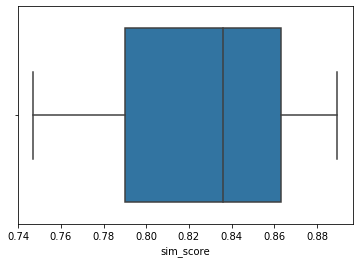

In [88]:

ax = sns.boxplot(x="sim_score", data=yet_another_groupby)

In [89]:
yet_another_groupby.head()

,sim_score
year,
1958,0.775468
1959,0.788437
1960,0.781908
1961,0.751702
1962,0.753737


In [90]:
yet_another_groupby = yet_another_groupby.reset_index()

In [91]:
yet_another_groupby.head()

,year,sim_score
0,1958,0.775468
1,1959,0.788437
2,1960,0.781908
3,1961,0.751702
4,1962,0.753737


In [92]:
yet_another_groupby.sim_score.describe()

count    62.000000
mean      0.827033
std       0.044419
min       0.746958
25%       0.790135
50%       0.836035
75%       0.863189
max       0.889652
Name: sim_score, dtype: float64

# Ok, yet_another_groupby is our groupby for plotting. Let's make some nice plots.

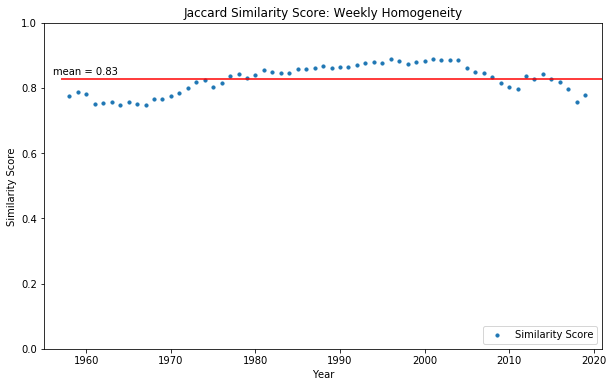

In [93]:
plt.figure(figsize=(10, 6))
plt.scatter('year', 'sim_score', data = yet_another_groupby, s=10, label='Similarity Score')
#plt.hlines(y=25, xmin = 0, xmax = 250, color = 'orange')
#plt.hlines(y=30, xmin = 0, xmax = 250, color = 'red')
plt.xlim(1955, 2021)
plt.ylim(0, 1)
#plt.annotate(s = 'overweight', xy = (0, 25))
#plt.annotate(s = 'obese', xy = (0, 30))
plt.hlines(y=.827, xmin = 1957, xmax = 2025, color = 'red')

plt.annotate(s = 'mean = 0.83', xy = (1956,.84))
plt.xlabel('Year')
plt.ylabel('Similarity Score')

plt.title('Jaccard Similarity Score: Weekly Homogeneity');

plt.legend(loc='lower right');

# Ok, now let's make a decades grouping for our boxplots

In [94]:
yet_another_groupby['decade'] = yet_another_groupby.year//10*10

In [95]:
yet_another_groupby['decade_str'] = yet_another_groupby.decade.astype(str) + 's'

In [96]:
yet_another_groupby = yet_another_groupby.sort_values(by=['decade_str'], ascending=True)

In [97]:
yet_another_groupby.head()

,year,sim_score,decade,decade_str
0,1958,0.775468,1950,1950s
1,1959,0.788437,1950,1950s
11,1969,0.767304,1960,1960s
10,1968,0.766407,1960,1960s
9,1967,0.746958,1960,1960s


In [98]:
yet_another_groupby['decade_str'] = yet_another_groupby['decade_str'].str.replace('1950s','1960s')

Text(0, 0.5, 'Similarity Score')

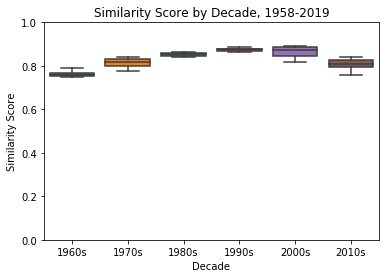

In [141]:
eda_boxplot = sns.boxplot(y="sim_score", x = "decade_str", data=yet_another_groupby)
plt.title('Similarity Score by Decade, 1958-2019')

#plt.xlim(1955, 2021)
plt.ylim(0, 1)

plt.xlabel('Decade')
plt.ylabel('Similarity Score')


# Note: everything below here is by quintile, which I'm not using

In [100]:


X = yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     18.53
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           6.28e-05
Time:                        11:20:33   Log-Likelihood:                 113.95
No. Observations:                  62   AIC:                            -223.9
Df Residuals:                      60   BIC:                            -219.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5511      0.552     -2.808      0.007      -2.656      -0.446
year           0.0012      0.000      4.305      0.000       0.001       0.002
==============================================================================
Omnibus:                        4.979   Durbin-Watson:                   0.514
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                4.242
Skew:                          -0.545   Prob(JB):                        0.120
Kurtosis:                       2.325   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
first_quintile_df = billboard_df[(billboard_df.week_position >= 1) & (billboard_df.week_position <= 20)]
second_quintile_df = billboard_df[(billboard_df.week_position >= 21) & (billboard_df.week_position <= 40)]
third_quintile_df = billboard_df[(billboard_df.week_position >= 41) & (billboard_df.week_position <= 60)]
fourth_quintile_df = billboard_df[(billboard_df.week_position >= 61) & (billboard_df.week_position <= 80)]
fifth_quintile_df = billboard_df[(billboard_df.week_position >= 81) & (billboard_df.week_position <= 100)]

In [102]:
first_quintile_weekly_array_groupby = first_quintile_df.groupby('week_id').song_id.unique().reset_index()
second_quintile_weekly_array_groupby = second_quintile_df.groupby('week_id').song_id.unique().reset_index()
third_quintile_weekly_array_groupby = third_quintile_df.groupby('week_id').song_id.unique().reset_index()
fourth_quintile_weekly_array_groupby = fourth_quintile_df.groupby('week_id').song_id.unique().reset_index()
fifth_quintile_weekly_array_groupby =fifth_quintile_df.groupby('week_id').song_id.unique().reset_index()

In [103]:
first_quintile_weekly_array_groupby = first_quintile_weekly_array_groupby.rename(columns={"song_id": "week_song_array"})
second_quintile_weekly_array_groupby = second_quintile_weekly_array_groupby.rename(columns={"song_id": "week_song_array"})
third_quintile_weekly_array_groupby = third_quintile_weekly_array_groupby.rename(columns={"song_id": "week_song_array"})
fourth_quintile_weekly_array_groupby = fourth_quintile_weekly_array_groupby.rename(columns={"song_id": "week_song_array"})
fifth_quintile_weekly_array_groupby = fifth_quintile_weekly_array_groupby.rename(columns={"song_id": "week_song_array"})

In [104]:
first_quintile_weekly_array_groupby['prev_week_song_array'] = first_quintile_weekly_array_groupby['week_song_array'].shift(periods=1)

second_quintile_weekly_array_groupby['prev_week_song_array'] = second_quintile_weekly_array_groupby['week_song_array'].shift(periods=1)
third_quintile_weekly_array_groupby['prev_week_song_array'] = third_quintile_weekly_array_groupby['week_song_array'].shift(periods=1)
fourth_quintile_weekly_array_groupby['prev_week_song_array'] = fourth_quintile_weekly_array_groupby['week_song_array'].shift(periods=1)
fifth_quintile_weekly_array_groupby['prev_week_song_array'] = fifth_quintile_weekly_array_groupby['week_song_array'].shift(periods=1)




In [105]:
first_new_df = first_quintile_weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()
second_new_df = second_quintile_weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()
third_new_df = third_quintile_weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()
fourth_new_df = fourth_quintile_weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()
fifth_new_df = fifth_quintile_weekly_array_groupby.apply(similarity_func_two, axis=1).to_frame()

In [106]:
first_new_df.columns = ["sim_score"]
second_new_df.columns = ["sim_score"]
third_new_df.columns = ["sim_score"]
fourth_new_df.columns = ["sim_score"]
fifth_new_df.columns = ["sim_score"]

In [107]:
first_quintile_weekly_groupby = first_quintile_df.groupby('week_id').min().reset_index().reset_index()
second_quintile_weekly_groupby = second_quintile_df.groupby('week_id').min().reset_index().reset_index()
third_quintile_weekly_groupby = third_quintile_df.groupby('week_id').min().reset_index().reset_index()
fourth_quintile_weekly_groupby = fourth_quintile_df.groupby('week_id').min().reset_index().reset_index()
fifth_quintile_weekly_groupby = fifth_quintile_df.groupby('week_id').min().reset_index().reset_index()


In [108]:
first_new_df = first_new_df.reset_index()
second_new_df = second_new_df.reset_index()
third_new_df = third_new_df.reset_index()
fourth_new_df = fourth_new_df.reset_index()
fifth_new_df = fifth_new_df.reset_index()

In [109]:
first_quintile_weekly_groupby = first_quintile_weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])
second_quintile_weekly_groupby = second_quintile_weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])
third_quintile_weekly_groupby = third_quintile_weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])
fourth_quintile_weekly_groupby = fourth_quintile_weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])
fifth_quintile_weekly_groupby = fifth_quintile_weekly_groupby.drop(columns=['week_position', 'song', 'performer', 'song_id', 'instance', 'prev_week_position', 'peak_position', 'weeks_on_chart', 'date', 'month', 'day'])

In [110]:
first_quintile_newest_df = first_new_df.set_index('index').join(first_quintile_weekly_groupby.set_index('index'))
second_quintile_newest_df = second_new_df.set_index('index').join(second_quintile_weekly_groupby.set_index('index'))
third_quintile_newest_df = third_new_df.set_index('index').join(third_quintile_weekly_groupby.set_index('index'))
fourth_quintile_newest_df = fourth_new_df.set_index('index').join(fourth_quintile_weekly_groupby.set_index('index'))
fifth_quintile_newest_df = fifth_new_df.set_index('index').join(fifth_quintile_weekly_groupby.set_index('index'))

In [111]:
first_quintile_yet_another_groupby = first_quintile_newest_df.groupby('year').mean()
second_quintile_yet_another_groupby = second_quintile_newest_df.groupby('year').mean()
third_quintile_yet_another_groupby = third_quintile_newest_df.groupby('year').mean()
fourth_quintile_yet_another_groupby = fourth_quintile_newest_df.groupby('year').mean()
fifth_quintile_yet_another_groupby = fifth_quintile_newest_df.groupby('year').mean()

In [143]:
first_quintile_yet_another_groupby.head()

,year,sim_score
0,1958,0.752485
1,1959,0.744198
2,1960,0.750144
3,1961,0.713682
4,1962,0.717183


(0, 1)

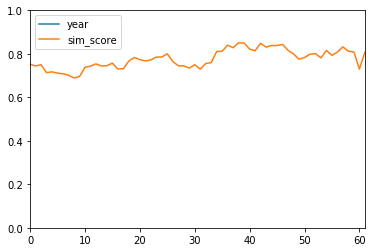

In [142]:
first_quintile_yet_another_groupby.plot()
plt.ylim(0,1)

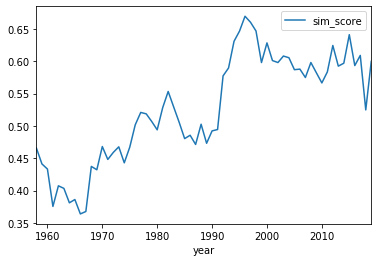

In [113]:
second_quintile_yet_another_groupby.plot()

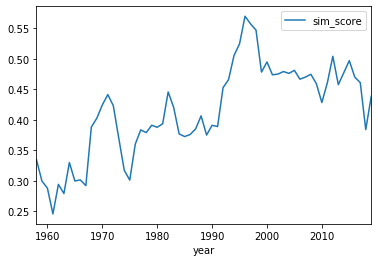

In [114]:
third_quintile_yet_another_groupby.plot()

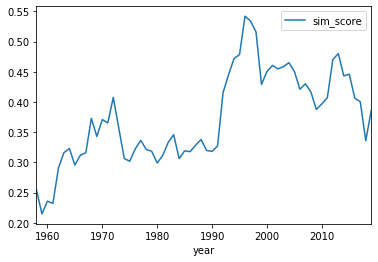

In [115]:
fourth_quintile_yet_another_groupby.plot()

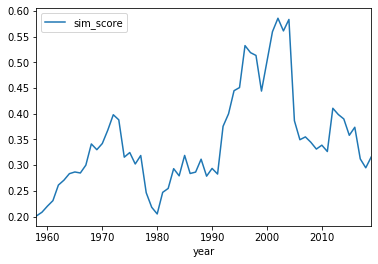

In [116]:
fifth_quintile_yet_another_groupby.plot()

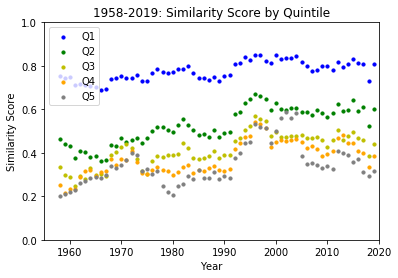

In [160]:

fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(first_quintile_yet_another_groupby.year, first_quintile_yet_another_groupby.sim_score, s=10, c='b', marker="o", label='Q1')
ax1.scatter(second_quintile_yet_another_groupby.year, second_quintile_yet_another_groupby.sim_score, s=10, c='g', marker="o", label='Q2')
ax1.scatter(third_quintile_yet_another_groupby.year, third_quintile_yet_another_groupby.sim_score, s=10, c='y', marker="o", label='Q3')
ax1.scatter(fourth_quintile_yet_another_groupby.year, fourth_quintile_yet_another_groupby.sim_score, s=10, c='orange', marker="o", label='Q4')
ax1.scatter(fifth_quintile_yet_another_groupby.year, fifth_quintile_yet_another_groupby.sim_score, s=10, c='gray', marker="o", label='Q5')

plt.xlim(1955, 2020)
plt.ylim(0, 1)
#plt.hlines(y=553, xmin = 1955, xmax = 2020, color = 'red')
#plt.hlines(y=321, xmin = 1955, xmax = 2020, color = 'purple')
#plt.hlines(y=128, xmin = 1955, xmax = 2020, color = 'black')
#plt.annotate(s = 'mean = 321', xy = (2020, 285))
#plt.annotate(s = 'mean = 554', xy = (2020, 530))
#plt.annotate(s = 'mean = 128', xy = (2020, 115))
plt.xlabel('Year')

plt.ylabel('Similarity Score')

plt.title('1958-2019: Similarity Score by Quintile')
plt.legend(loc='upper left');

In [117]:
first_quintile_yet_another_groupby.describe()

,sim_score
count,62.000000
mean,0.776402
std,0.043404
min,0.688983
25%,0.744273
50%,0.774210
75%,0.811685
max,0.851068


In [118]:
second_quintile_yet_another_groupby.describe()

,sim_score
count,62.000000
mean,0.526362
std,0.083034
min,0.363981
25%,0.467340
50%,0.522909
75%,0.597858
max,0.669743


In [119]:
third_quintile_yet_another_groupby.describe()

,sim_score
count,62.000000
mean,0.414552
std,0.075169
min,0.245952
25%,0.375358
50%,0.421916
75%,0.472931
max,0.569815


In [120]:
fourth_quintile_yet_another_groupby.describe()

,sim_score
count,62.000000
mean,0.373816
std,0.075807
min,0.214605
25%,0.318253
50%,0.361038
75%,0.439918
max,0.542027


In [121]:
fifth_quintile_yet_another_groupby.describe()

,sim_score
count,62.000000
mean,0.347247
std,0.096662
min,0.201208
25%,0.283953
50%,0.325482
75%,0.389364
max,0.585649


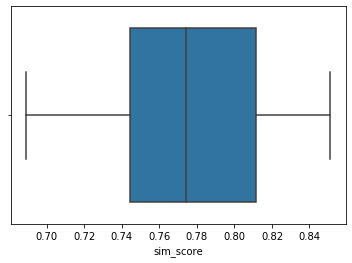

In [122]:
ax = sns.boxplot(x="sim_score", data=first_quintile_yet_another_groupby)

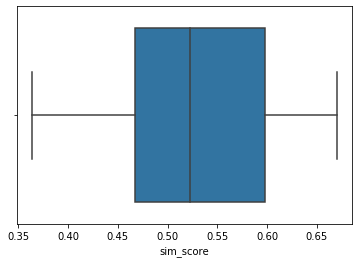

In [123]:
ax = sns.boxplot(x="sim_score", data=second_quintile_yet_another_groupby)

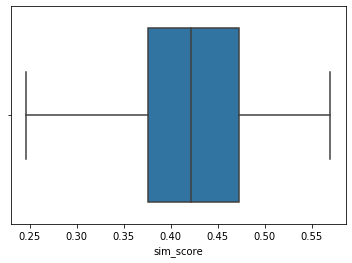

In [124]:
ax = sns.boxplot(x="sim_score", data=third_quintile_yet_another_groupby)

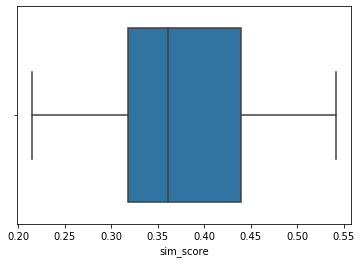

In [125]:
ax = sns.boxplot(x="sim_score", data=fourth_quintile_yet_another_groupby)

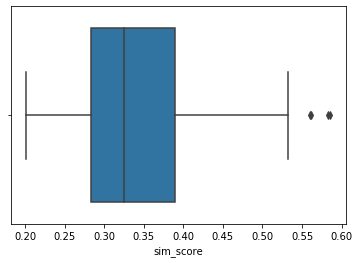

In [126]:
ax = sns.boxplot(x="sim_score", data=fifth_quintile_yet_another_groupby)

In [127]:
fifth_quintile_yet_another_groupby.head()

,sim_score
year,
1958,0.201208
1959,0.208353
1960,0.220232
1961,0.230900
1962,0.261230


In [128]:
fifth_quintile_yet_another_groupby = fifth_quintile_yet_another_groupby.sort_values(by=['sim_score'], ascending=False)

In [129]:
first_quintile_yet_another_groupby = first_quintile_yet_another_groupby.reset_index()

In [130]:
second_quintile_yet_another_groupby = second_quintile_yet_another_groupby.reset_index()

In [131]:
third_quintile_yet_another_groupby = third_quintile_yet_another_groupby.reset_index()

In [132]:
fourth_quintile_yet_another_groupby = fourth_quintile_yet_another_groupby.reset_index()

In [133]:
fifth_quintile_yet_another_groupby = fifth_quintile_yet_another_groupby.reset_index()

In [134]:


X = first_quintile_yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = first_quintile_yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

C:\Users\dingw\Anaconda3_new\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.492
Method:                 Least Squares   F-statistic:                     60.04
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.32e-10
Time:                        11:21:00   Log-Likelihood:                 128.54
No. Observations:                  62   AIC:                            -253.1
Df Residuals:                      60   BIC:                            -248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.6069      0.437     -5.970      0.000      -3.480      -1.733
year           0.0017      0.000      7.749      0.000       0.001       0.002
==============================================================================
Omnibus:                        1.036   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.596   Jarque-Bera (JB):                0.520
Skew:                          -0.196   Prob(JB):                        0.771
Kurtosis:                       3.218   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [135]:


X = second_quintile_yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = second_quintile_yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.701
Method:                 Least Squares   F-statistic:                     143.9
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.39e-17
Time:                        11:21:00   Log-Likelihood:                 104.74
No. Observations:                  62   AIC:                            -205.5
Df Residuals:                      60   BIC:                            -201.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1621      0.641    -11.175      0.000      -8.444      -5.880
year           0.0039      0.000     11.997      0.000       0.003       0.005
==============================================================================
Omnibus:                        1.973   Durbin-Watson:                   0.465
Prob(Omnibus):                  0.373   Jarque-Bera (JB):                1.337
Skew:                           0.342   Prob(JB):                        0.512
Kurtosis:                       3.225   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [136]:


X = third_quintile_yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = third_quintile_yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.575
Model:                            OLS   Adj. R-squared:                  0.568
Method:                 Least Squares   F-statistic:                     81.07
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           9.73e-13
Time:                        11:21:00   Log-Likelihood:                 99.488
No. Observations:                  62   AIC:                            -195.0
Df Residuals:                      60   BIC:                            -190.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.8660      0.698     -8.409      0.000      -7.261      -4.471
year           0.0032      0.000      9.004      0.000       0.002       0.004
==============================================================================
Omnibus:                        3.432   Durbin-Watson:                   0.463
Prob(Omnibus):                  0.180   Jarque-Bera (JB):                2.558
Skew:                           0.457   Prob(JB):                        0.278
Kurtosis:                       3.393   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [137]:


X = fourth_quintile_yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = fourth_quintile_yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.494
Method:                 Least Squares   F-statistic:                     60.63
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           1.13e-10
Time:                        11:21:00   Log-Likelihood:                 94.113
No. Observations:                  62   AIC:                            -184.2
Df Residuals:                      60   BIC:                            -180.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.5496      0.761     -7.295      0.000      -7.071      -4.028
year           0.0030      0.000      7.787      0.000       0.002       0.004
==============================================================================
Omnibus:                        3.880   Durbin-Watson:                   0.352
Prob(Omnibus):                  0.144   Jarque-Bera (JB):                3.134
Skew:                           0.538   Prob(JB):                        0.209
Kurtosis:                       3.237   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [138]:


X = fifth_quintile_yet_another_groupby["year"] ## X usually means our input variables (or independent variables)
y = fifth_quintile_yet_another_groupby["sim_score"] ## Y usually means our output/dependent variable
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              sim_score   R-squared:                       0.253
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     20.27
Date:                Wed, 08 Jan 2020   Prob (F-statistic):           3.15e-05
Time:                        11:21:00   Log-Likelihood:                 66.418
No. Observations:                  62   AIC:                            -128.8
Df Residuals:                      60   BIC:                            -124.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0065      1.189     -4.210      0.000      -7.385      -2.628
year           0.0027      0.001      4.502      0.000       0.001       0.004
==============================================================================
Omnibus:                        7.025   Durbin-Watson:                   0.631
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                7.115
Skew:                           0.828   Prob(JB):                       0.0285
Kurtosis:                       2.898   Cond. No.                     2.21e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# This is the end of this notebook.